# Sales and revenue analysis

## Imports

In [3]:
# Importing packages
import pandas as pd 
import numpy as np
import zipfile

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [ ]:
#Importing the csv files
calendar= pd.read_csv('DS_market_data\daily_calendar_with_events.csv')
price= pd.read_csv('DS_market_data\item_prices.zip')
pd_sales = pd.read_csv('DS_market_data\item_sales.zip')

In [ ]:
#dollar value table
dollar = pd.read_csv('DS_market_data\dollar_value_table.csv', index_col=0)

## First look and Dataframe transformation

In [3]:
# id is a combination of item, category, department and store code
# cheking for dupplicates
assert pd_sales[['item', 'category', 'department', 'store_code']].shape[0] == pd_sales['id'].nunique()

In [29]:
#Creating a new column "Total sales"
pd_sales['Total_sales'] = pd_sales.iloc[:,7:].sum(axis = 1)
pd_sales.head()

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,Total_sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,1,0,1,1,2,2,2,4,1849


## Proportion of total item inventory in each region

In [5]:
pd_sales.region.value_counts(normalize=True)

New York        0.4
Philadelphia    0.3
Boston          0.3
Name: region, dtype: float64

In [6]:
items_per_city_fig = px.bar(pd_sales, x= [ "New York","Boston", "Philladelphia"], y= pd_sales.region.value_counts(normalize=True), text=pd_sales.region.value_counts(normalize=True), title="Proportion of total items in per city", color=["red", "blue", "green"])
items_per_city_fig.update_xaxes(title_text = '')
items_per_city_fig.update_yaxes(title_text = 'Percentage')
items_per_city_fig.update_traces(texttemplate='%{text:.0%}', textposition='inside')
items_per_city_fig.show()

## Proportion of Total sales and Revenue per city

### Sales

In [30]:
# Total sales per city df
Tot_sales_regions = pd_sales[['Total_sales', 'region']].groupby('region').sum()
Tot_sales_regions

,Total_sales
region,
Boston,18899006
New York,28675547
Philadelphia,18120856


In [ ]:
#Total sales per city plot
Tot_sales_fig = px.bar(y = Tot_sales_regions['Total_sales'].values, x= Tot_sales_regions.index, color=Tot_sales_regions.index, text=Tot_sales_regions['Total_sales'].values)
Tot_sales_fig.update_layout(title_text = "Total Sales per region", title_x = 0.45, xaxis_title = '', yaxis_title ='Sales')
Tot_sales_fig.update_xaxes(title_text = '')
Tot_sales_fig.update_yaxes(title_text = 'Percentage')
Tot_sales_fig.show()


In [31]:
# Proportion of Total sales per city df
tot_sales = Tot_sales_regions.agg({"Total_sales":sum})
Tot_sales_regions_perc = Tot_sales_regions.div(tot_sales)
Tot_sales_regions_perc


,Total_sales
region,
Boston,0.287676
New York,0.436492
Philadelphia,0.275831


43% of our sales are made in New york!

In [9]:
#Total sales percentage per city plot
Tot_sales_fig = px.bar(y = Tot_sales_regions_perc['Total_sales'].values, x= Tot_sales_regions_perc.index, color=Tot_sales_regions_perc.index, text=Tot_sales_regions_perc['Total_sales'].values)
Tot_sales_fig.update_layout(title_text = " Proportion of total Sales per region", title_x = 0.45, xaxis_title = '', yaxis_title ='%')
Tot_sales_fig.update_xaxes(title_text = '')
Tot_sales_fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
Tot_sales_fig.show()


The city that holds the most inventory is Boston whereas the city that make the most sales is New York

### Revenue

In [10]:
# Total sales per city df
Tot_revenue_regions = dollar[['revenue', 'region']].groupby('region').sum()
Tot_revenue_regions['($) millions'] = (Tot_revenue_regions['revenue']/1000000).apply(lambda x: '${:,.2f}MM'.format(x))
Tot_revenue_regions

,revenue,($) millions
region,,
Boston,6.690535e+07,$66.91MM
New York,1.040122e+08,$104.01MM
Philadelphia,6.093761e+07,$60.94MM


In [ ]:
#Total sales per city plot
Tot_revenue_fig = px.bar(y = Tot_revenue_regions['revenue'].values, x= Tot_revenue_regions.index, color=Tot_revenue_regions.index, text=Tot_revenue_regions['revenue'].values)
Tot_revenue_fig.update_layout(title_text = " Proportion of total revenue per region", title_x = 0.45, xaxis_title = '', yaxis_title ='revenue')
Tot_revenue_fig.update_xaxes(title_text = '')
Tot_revenue_fig.show()

In [11]:
# Proportion of Total sales per city df
tot_revenue = Tot_revenue_regions.agg({"revenue":sum})
Tot_revenue_regions_perc = Tot_revenue_regions.div(tot_revenue)
Tot_revenue_regions_perc


,($) millions,revenue
region,,
Boston,NaN,0.288565
New York,NaN,0.448609
Philadelphia,NaN,0.262826


45% of our revenue made in New york, so very similar to sales

In [6]:
#Total sales per city plot
Tot_revenue_per_fig = px.bar(y = Tot_revenue_regions_perc['revenue'].values, x= Tot_revenue_regions_perc.index, color=Tot_revenue_regions_perc.index, text=Tot_revenue_regions_perc['revenue'].values)
Tot_revenue_per_fig.update_layout(title_text = " Proportion of total revenue per region", title_x = 0.45, xaxis_title = '', yaxis_title ='revenue')
Tot_revenue_per_fig.update_xaxes(title_text = '')
Tot_revenue_per_fig.update_yaxes(title_text = 'Percentage')
Tot_revenue_per_fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
Tot_revenue_per_fig.show()


## Most popular items Globally based on sales

In [10]:
# Making a Dataframe of the 10 most sold items 
top10 = pd_sales[['item', 'Total_sales']].groupby('item').sum()
top10= top10.sort_values('Total_sales', ascending=False).iloc[:10]
top10

,Total_sales
item,
SUPERMARKET_3_090,1002529
SUPERMARKET_3_586,920242
SUPERMARKET_3_252,565299
SUPERMARKET_3_555,491287
SUPERMARKET_3_714,396172
SUPERMARKET_3_587,396119
SUPERMARKET_3_694,390001
SUPERMARKET_3_226,363082
SUPERMARKET_3_202,295689


In [11]:
# Looking at the proportion of total sales that the top 10 items account for
top10_per = top10.div(tot_sales)
top10_per

,Total_sales
item,
SUPERMARKET_3_090,0.015260
SUPERMARKET_3_586,0.014008
SUPERMARKET_3_252,0.008605
SUPERMARKET_3_555,0.007478
SUPERMARKET_3_714,0.006030
SUPERMARKET_3_587,0.006030
SUPERMARKET_3_694,0.005937
SUPERMARKET_3_226,0.005527
SUPERMARKET_3_202,0.004501


In [12]:
# Plotting the absolute value df
top10_fig = px.bar(y = top10['Total_sales'].values, x= top10.index, color=top10.index, text=top10['Total_sales'].values)
top10_fig.update_layout(title_text = "Most sold items across all regions", title_x = 0.45, yaxis_title = 'Sales')
top10_fig.update_xaxes(visible=False, showticklabels=False)


In [13]:
# Plotting the percentage 
top10_per_fig = px.bar(y = top10_per['Total_sales'].values, x= top10.index, color=top10.index, text=top10_per['Total_sales'].values)
top10_per_fig.update_layout(title_text = "Percentage of of total sales by the top 10 most sold items", title_x = 0.45, yaxis_title = 'Percentage of total sales')
top10_per_fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
top10_per_fig.update_xaxes(visible=False, showticklabels=False)

No item takes a predominant proportion of total sales

### looking at the repartition of sales per region of the 5 most sold items 

In [14]:
pd_sales

,id,item,category,department,store,store_code,region,d_1,d_2,d_3,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,Total_sales
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,0,0,0,...,1,1,0,1,1,2,2,2,4,1849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,SUPERMARKET_3_823_PHI_3,SUPERMARKET_3_823,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,2,...,0,0,0,0,0,1,0,0,1,1022
30486,SUPERMARKET_3_824_PHI_3,SUPERMARKET_3_824,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,0,0,0,0,0,0,1,0,720
30487,SUPERMARKET_3_825_PHI_3,SUPERMARKET_3_825,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,6,0,...,1,0,2,0,1,0,0,1,0,1712
30488,SUPERMARKET_3_826_PHI_3,SUPERMARKET_3_826,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,0,0,0,...,0,1,0,0,1,0,3,1,3,702


In [15]:
pd_sales[["region", 'Total_sales']].groupby(by=["region"]).agg({"Total_sales": sum})

,Total_sales
region,
Boston,18899006
New York,28675547
Philadelphia,18120856


In [64]:
#Making a df of the 5 most sold items
top5 = pd_sales[['item', 'Total_sales']].groupby(['item']).sum()
top5= top5.sort_values('Total_sales', ascending=False).iloc[:5]

#Transforming the absolute values into percentages
top5_across_regions = pd_sales[['item', 'Total_sales', "region"]].groupby(["item", "region"]).agg({'Total_sales': 'sum'})
top5_across_regions =top5_across_regions[top5_across_regions.index.get_level_values(0).isin(top5.index.get_level_values(0))]

# Dividing the sales of each region by total sales of that region to get the adjusted values
v =[18899006,28675547,18120856,18899006,28675547,18120856,18899006,28675547,18120856,18899006,28675547,18120856,18899006,28675547,18120856,]
for x in range(15):
    top5_across_regions["Total_sales"].iloc[x] = top5_across_regions["Total_sales"].iloc[x]/v[x]



In [76]:
#Getting the total of the adjusted sales
sums = []
for i in range(5):
    if i == 0: 
        sums.append(top5_across_regions["Total_sales"].iloc[:3].sum())
    elif i == 1:
        sums.append(top5_across_regions["Total_sales"].iloc[3:6].sum())    
    else:
        x = i*3
        sums.append(top5_across_regions["Total_sales"].iloc[x:(x+3)].sum())


In [79]:
#Getting the percentage of the adjusted sales for each items
for i in range(5):
    if i == 0: 
        top5_across_regions["Total_sales"].iloc[:3] = top5_across_regions["Total_sales"].iloc[:3]/sums[i]
    elif i == 1:
        top5_across_regions["Total_sales"].iloc[3:6] = top5_across_regions["Total_sales"].iloc[3:6]/sums[i]
    else:
        x = i*3
        top5_across_regions["Total_sales"].iloc[x:(x+3)] = top5_across_regions["Total_sales"].iloc[x:(x+3)]/sums[i]
        

In [84]:
#Reverting the multiidex df into a single df, because it will be easier to plot
unstacked = top5_across_regions.unstack(level=["region"])
unstacked = unstacked[unstacked.index.isin(top5.index)].reset_index(level=0)
unstacked

item Total_sales                       
region                         Boston  New York Philadelphia
0       SUPERMARKET_3_090    0.388263  0.379223     0.232514
1       SUPERMARKET_3_252    0.527353  0.320646     0.152001
2       SUPERMARKET_3_555    0.546546  0.207785     0.245669
3       SUPERMARKET_3_586    0.556662  0.256219     0.187119
4       SUPERMARKET_3_714    0.369126  0.273699     0.357175

In [86]:
#Ploting the result
fig2 = go.Figure(
  data=[
    go.Bar(
      name= 'Boston',
      x=unstacked.item,
      y= unstacked[("Total_sales", "Boston")],
      offsetgroup=0,
      marker_color = 'blue',
      text = unstacked[("Total_sales", "Boston")]),
      
    go.Bar(
      name= "New York",
      x=unstacked.item,
      y= unstacked[("Total_sales", "New York")],
      offsetgroup=0,
      marker_color = 'red',
      base=unstacked[("Total_sales", "Boston")],
      text = unstacked[("Total_sales", "New York")]),

    go.Bar(
      name= "Philadelphia",
      x=unstacked.item,
      y= unstacked[("Total_sales", "Philadelphia")],
      offsetgroup=0,
      marker_color = 'green',
      base=unstacked[("Total_sales", "Boston")]+unstacked[("Total_sales", "New York")],
      text = unstacked[("Total_sales", "Philadelphia")])


  ], 
  layout=go.Layout(
    title="5 most popular items' sales proportion per region, compared to total sales distribution",
    yaxis_title='percentage',
    width = 1000
  )
)
fig2.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig2.update_layout(title_x= 0.5)


I have now adjusted the graph dividing each value by the total sales of the region

We can already see, for example, that the top 5 most sold products have higher sales in Boston (compared to its contribution to the total sales). The most sold items are less popular in Philadelphia (just supermarket_3_714 is aligned and slighty above the % of total sales). It is surprising that the top 3, 4 and 5 items are not so popular in New York, which is the region with higher sales. 

## Top 10 items based on revenue

In [26]:
# Making a Dataframe of the 10 most sold items 
top10_rev = dollar[['item', 'revenue']].groupby('item').sum()
top10_rev= top10_rev.sort_values('revenue', ascending=False).iloc[:10]
top10_rev['($) millions'] = (top10_rev['revenue']/1000000).apply(lambda x: '${:,.2f}MM'.format(x))
top10_rev

,revenue,($) millions
item,,
SUPERMARKET_3_586,1.762422e+06,$1.76MM
SUPERMARKET_3_120,1.691208e+06,$1.69MM
SUPERMARKET_3_090,1.639986e+06,$1.64MM
SUPERMARKET_3_202,1.506552e+06,$1.51MM
SUPERMARKET_3_587,1.190072e+06,$1.19MM
SUPERMARKET_3_252,1.031342e+06,$1.03MM
SUPERMARKET_3_555,9.408721e+05,$0.94MM
ACCESORIES_1_354,9.037165e+05,$0.90MM
SUPERMARKET_3_444,8.372884e+05,$0.84MM


In [25]:
# Looking at the proportion of total sales that the top 10 items account for
top10_rev_per = top10_rev.div(tot_revenue)
top10_rev_per

,revenue
item,
SUPERMARKET_3_586,0.007601
SUPERMARKET_3_120,0.007294
SUPERMARKET_3_090,0.007073
SUPERMARKET_3_202,0.006498
SUPERMARKET_3_587,0.005133
SUPERMARKET_3_252,0.004448
SUPERMARKET_3_555,0.004058
ACCESORIES_1_354,0.003898
SUPERMARKET_3_444,0.003611


In [28]:
# Plotting the absolute values 
top10_rev_fig = px.bar(y = top10_rev['revenue'].values, x= top10_rev.index, color=top10_rev.index, text=top10_rev['($) millions'])
top10_rev_fig.update_layout(title_text = "Products with the higher contribution to total sales ($)", title_x = 0.45, yaxis_title = 'Total revenue')
top10_rev_fig.update_xaxes(visible=False, showticklabels=False)

In [14]:
# Plotting the absolute value df
top10_rev_per_fig = px.bar(y = top10_rev_per['revenue'].values, x= top10_rev_per.index, color=top10_rev.index, text=top10_rev_per['revenue'].values)
top10_rev_per_fig.update_layout(title_text = "Products with the higher contribution to total sales (%) ", title_x = 0.45, yaxis_title = 'Percenatge of Total Revenue')
top10_rev_per_fig.update_xaxes(visible=False, showticklabels=False)
top10_rev_per_fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')


## Top category per Region based on sales

In [ ]:
# Top categories New York (by sales)
top_NY_category = pd_sales.loc[pd_sales['region'] == 'New York',['category', 'Total_sales']].groupby('category').sum()
top_NY_category= top_NY_category.sort_values('Total_sales', ascending=False).iloc[:3]
top_NY_category

top_NY_category_p = pd_sales.loc[pd_sales['region'] == 'New York',['category', 'Total_sales']].groupby('category').sum()
top_NY_category= top_NY_category.sort_values('Total_sales', ascending=False).iloc[:3]
top_NY_category

,Total_sales
category,
SUPERMARKET,19196302
HOME_&_GARDEN,6439362
ACCESORIES,3039883


In [ ]:
# Top categories Boston (by sales)
top_BS_category = pd_sales.loc[pd_sales['region'] == 'Boston',['category', 'Total_sales']].groupby('category').sum()
top_BS_category= top_BS_category.sort_values('Total_sales', ascending=False).iloc[:3]
top_BS_category

,Total_sales
category,
SUPERMARKET,12956421
HOME_&_GARDEN,4350246
ACCESORIES,1592339


In [ ]:
# Top categories Philadelphia (by sales)
top_PH_category = pd_sales.loc[pd_sales['region'] == 'Philadelphia',['category', 'Total_sales']].groupby('category').sum()
top_PH_category= top_PH_category.sort_values('Total_sales', ascending=False).iloc[:3]
top_PH_category

,Total_sales
category,
SUPERMARKET,12937216
HOME_&_GARDEN,3691062
ACCESORIES,1492578


In [ ]:
labels = ["SUPERMARKET", "HOME&GARDEN", "ACCESORIES"]

specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]

fig = make_subplots(rows=2, cols=2, specs=specs,
                    subplot_titles=['New_York', 'Boston', 'Philadelphia'])

fig.add_trace(go.Pie(labels=labels, values=top_NY_category['Total_sales'],
                     name="Category sales mix NY"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=top_BS_category['Total_sales'],
                     name="Category sales mix Boston"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=top_PH_category['Total_sales'],
                     name="Category sales mix Philadelphia"), 2, 1)

fig.update_layout(title_text='Category sales mix', width=1000, height=700 )
fig.show()

## Looking at the sales in each region

### New York

#### Items analysis

In [ ]:
# Top 10 item New York (by sales)
top10_NY = pd_sales.loc[pd_sales['region'] == 'New York',['item', 'Total_sales']].groupby('item').sum()
top10_NY= top10_NY.sort_values('Total_sales', ascending=False).iloc[:10]
top10_NY

,Total_sales
item,
SUPERMARKET_3_090,486138
SUPERMARKET_3_586,318050
SUPERMARKET_3_252,237172
SUPERMARKET_3_120,176446
SUPERMARKET_3_587,166065
SUPERMARKET_3_808,165778
SUPERMARKET_3_635,158166
SUPERMARKET_3_541,156589
SUPERMARKET_3_714,146000


In [ ]:
#Ploting the top 10
top10_NY_fig = px.bar(y = top10_NY['Total_sales'].values, x= top10_NY.index, color=top10_NY.index, text=top10_NY['Total_sales'].values)
top10_NY_fig.update_layout(title_text = "Most sold items in New York", title_x = 0.45, yaxis_title = 'Sales')
top10_NY_fig.update_xaxes(visible=False, showticklabels=False)

In [ ]:
# Top 10 less sold items New York 
worst_NY = pd_sales.loc[pd_sales['region'] == 'New York',['item', 'Total_sales']].groupby('item').sum()
worst_NY= worst_NY.sort_values('Total_sales').iloc[:11]
worst_NY

,Total_sales
item,
ACCESORIES_1_052,233
HOME_&_GARDEN_1_300,257
ACCESORIES_2_027,271
SUPERMARKET_2_209,272
SUPERMARKET_2_117,281
ACCESORIES_2_084,294
HOME_&_GARDEN_2_397,307
ACCESORIES_2_111,307
HOME_&_GARDEN_2_175,323


In [ ]:
worst_NY_fig = px.bar(y = worst_NY['Total_sales'].sort_values(ascending = False).values, x= worst_NY.index, color=worst_NY.index, text=worst_NY['Total_sales'].values)
worst_NY_fig.update_layout(title_text = "Less sold items in New York", title_x = 0.45, yaxis_title = 'Sales')
worst_NY_fig.update_layout(xaxis={'categoryorder':'total ascending'})
worst_NY_fig.update_xaxes(visible=False, showticklabels=False)

#### Category analysis

In [ ]:
pd_sales.category.value_counts()

SUPERMARKET      14370
HOME_&_GARDEN    10470
ACCESORIES        5650
Name: category, dtype: int64

In [ ]:
# looking at the sales of each category
top_cat_NY = pd_sales.loc[pd_sales['region'] == 'New York',['category', 'Total_sales']].groupby('category').sum()


In [ ]:
#Ploting 
topcat_NY_fig = px.bar(y = top_cat_NY['Total_sales'].values, x= top_cat_NY.index, color=top_cat_NY.index, text=top_cat_NY['Total_sales'].values)
topcat_NY_fig.update_layout(title_text = "Sales per item category in New York", title_x = 0.45, yaxis_title = 'Sales', xaxis_title = 'Item Category')


### Boston

#### Item analysis

In [ ]:
# Top 10 item Boston
top10_BST = pd_sales.loc[pd_sales['region'] == 'Boston',['item', 'Total_sales']].groupby('item').sum()
top10_BST= top10_NY.sort_values('Total_sales', ascending=False).iloc[:10]
top10_BST

,Total_sales
item,
SUPERMARKET_3_090,486138
SUPERMARKET_3_586,318050
SUPERMARKET_3_252,237172
SUPERMARKET_3_120,176446
SUPERMARKET_3_587,166065
SUPERMARKET_3_808,165778
SUPERMARKET_3_635,158166
SUPERMARKET_3_541,156589
SUPERMARKET_3_714,146000


In [ ]:
top10_BST_fig = px.bar(y = top10_BST['Total_sales'].values, x= top10_BST.index, color=top10_NY.index, text=top10_BST['Total_sales'].values)
top10_BST_fig.update_layout(title_text = "Most sold items in Boston", title_x = 0.45, yaxis_title = 'Sales')
top10_BST_fig.update_xaxes(visible=False, showticklabels=False)

In [ ]:
# Top 10 less sold items Boston 
worst_BST = pd_sales.loc[pd_sales['region'] == 'Boston',['item', 'Total_sales']].groupby('item').sum()
worst_BST= worst_BST.sort_values('Total_sales').iloc[:11]
worst_BST

,Total_sales
item,
HOME_&_GARDEN_2_101,111
SUPERMARKET_3_171,118
SUPERMARKET_2_071,126
ACCESORIES_1_217,143
HOME_&_GARDEN_2_077,149
HOME_&_GARDEN_2_245,154
ACCESORIES_2_119,163
HOME_&_GARDEN_1_216,175
SUPERMARKET_2_073,177


In [ ]:
worst_BST_fig = px.bar(y = worst_BST['Total_sales'].sort_values(ascending = False).values, x= worst_BST.index, color=worst_BST.index, text=worst_BST['Total_sales'].values)
worst_BST_fig.update_layout(title_text = "Less sold items in Boston", title_x = 0.45, yaxis_title = 'Sales')
worst_BST_fig.update_layout(xaxis={'categoryorder':'total ascending'})
worst_BST_fig.update_xaxes(visible=False, showticklabels=False)

#### Category analysis

In [ ]:
# looking at the sales of each category
top_cat_BST = pd_sales.loc[pd_sales['region'] == 'Boston',['category', 'Total_sales']].groupby('category').sum()

In [ ]:
#Ploting 
topcat_BST_fig = px.bar(y = top_cat_BST['Total_sales'].values, x= top_cat_BST.index, color=top_cat_BST.index, text=top_cat_BST['Total_sales'].values)
topcat_BST_fig.update_layout(title_text = "Sales per item category in Boston", title_x = 0.45, yaxis_title = 'Sales', xaxis_title = 'Item Category')


### Philladelphia

#### Item analysis

In [ ]:
# Top 10 item Philadelphia (by sales)
top10_PH = pd_sales.loc[pd_sales['region'] == 'Philadelphia',['item', 'Total_sales']].groupby('item').sum()
top10_PH = top10_PH.sort_values('Total_sales', ascending=False).iloc[:10]
top10_PH

,Total_sales
item,
SUPERMARKET_3_226,247186
SUPERMARKET_3_090,188357
SUPERMARKET_3_694,186096
SUPERMARKET_3_586,146781
SUPERMARKET_3_714,120400
SUPERMARKET_3_318,109118
SUPERMARKET_3_555,105456
SUPERMARKET_3_234,102899
SUPERMARKET_2_360,95869


In [ ]:
top10_PH_fig = px.bar(y = top10_PH['Total_sales'].values, x= top10_PH.index, color=top10_PH.index, text=top10_PH['Total_sales'].values)
top10_PH_fig.update_layout(title_text = "Most sold items in Philladelphia", title_x = 0.45, yaxis_title = 'Sales')
top10_PH_fig.update_xaxes(visible=False, showticklabels=False)

In [ ]:
# Top 10 less sold items Philadelphia 
worst_PH = pd_sales.loc[pd_sales['region'] == 'Philadelphia',['item', 'Total_sales']].groupby('item').sum()
worst_PH= worst_PH.sort_values('Total_sales').iloc[:11]
worst_PH

,Total_sales
item,
HOME_&_GARDEN_2_130,104
HOME_&_GARDEN_2_101,116
ACCESORIES_1_389,118
HOME_&_GARDEN_2_396,121
HOME_&_GARDEN_2_161,138
HOME_&_GARDEN_2_005,141
HOME_&_GARDEN_2_216,142
HOME_&_GARDEN_2_202,149
HOME_&_GARDEN_2_307,155


In [ ]:
worst_PH_fig = px.bar(y = worst_PH['Total_sales'].sort_values(ascending = False).values, x= worst_PH.index, color=worst_PH.index, text=worst_PH['Total_sales'].values)
worst_PH_fig.update_layout(title_text = "Less sold items in Philladelphia", title_x = 0.45, yaxis_title = 'Sales')
worst_PH_fig.update_layout(xaxis={'categoryorder':'total ascending'})
worst_PH_fig.update_xaxes(visible=False, showticklabels=False)

#### Category analysis

In [ ]:
# looking at the sales of each category
top_cat_PH = pd_sales.loc[pd_sales['region'] == 'Philadelphia',['category', 'Total_sales']].groupby('category').sum()

In [ ]:
#Ploting 
topcat_PH_fig = px.bar(y = top_cat_PH['Total_sales'].values, x= top_cat_PH.index, color=top_cat_PH.index, text=top_cat_PH['Total_sales'].values)
topcat_PH_fig.update_layout(title_text = "Sales per item category in Philadelphia", title_x = 0.45, yaxis_title = 'Sales', xaxis_title = 'Item Category')

### Consolidated Subplots

##### Most sold items

In [ ]:
figure1_traces = []
figure2_traces = []
figure3_traces = []


for trace in range(len(top10_NY_fig["data"])):
    figure1_traces.append(top10_NY_fig["data"][trace])
for trace in range(len(top10_BST_fig["data"])):
    figure2_traces.append(top10_BST_fig["data"][trace])
for trace in range(len(top10_PH_fig["data"])):
    figure3_traces.append(top10_PH_fig["data"][trace])

#Create a 1x2 subplot
region_bestitems_subplot = make_subplots(rows=1, cols=3, subplot_titles=("New York", "Boston", "Philladelphia"))

# Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
for traces in figure1_traces:
    region_bestitems_subplot.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    region_bestitems_subplot.append_trace(traces, row=1, col=2)
for traces in figure3_traces:
    region_bestitems_subplot.append_trace(traces, row=1, col=3)

region_bestitems_subplot.update_xaxes(visible=False, showticklabels=False, row=1, col=1)
region_bestitems_subplot.update_xaxes(visible=False, showticklabels=False, row=1, col=2)
region_bestitems_subplot.update_xaxes(visible=False, showticklabels=False, row=1, col=3)



region_bestitems_subplot.update_layout(height=450, width=1300, title_text = 'Most Popular items', title_x = 0.07, title_font= {'size':24, 'color':'darkblue'})
region_bestitems_subplot.show()

#### Least sold items

In [ ]:
figure1_traces = []
figure2_traces = []
figure3_traces = []


for trace in range(len(worst_NY_fig["data"])):
    figure1_traces.append(worst_NY_fig["data"][trace])
for trace in range(len(worst_BST_fig["data"])):
    figure2_traces.append(worst_BST_fig["data"][trace])
for trace in range(len(worst_PH_fig["data"])):
    figure3_traces.append(worst_PH_fig["data"][trace])

#Create a 1x3 subplot
region_worstitems_subplot = make_subplots(rows=3, cols=1, subplot_titles=("New York", "Boston", "Philladelphia"), shared_xaxes=True)

# Get the Express fig broken down as traces and add the traces to the proper plot within in the subplot
for traces in figure1_traces:
    region_worstitems_subplot.append_trace(traces, row=1, col=1)
for traces in figure2_traces:
    region_worstitems_subplot.append_trace(traces, row=2, col=1)
for traces in figure3_traces:
    region_worstitems_subplot.append_trace(traces, row=3, col=1)

region_worstitems_subplot.update_xaxes(visible=False, showticklabels=False, row=1, col=1)
region_worstitems_subplot.update_xaxes(visible=False, showticklabels=False, row=1, col=2)
region_bestitems_subplot.update_xaxes(visible=False, showticklabels=False, row=1, col=3)


region_worstitems_subplot.update_layout(height=1200, width=1000, title_text = 'least Popular items', title_x = 0.07, title_font= {'size':24, 'color':'darkblue'})
region_worstitems_subplot.show()

## Stores analysis

### Best overall stores based on sales

In [ ]:
#Finding the total number of stores
print(f"There are {pd_sales.store.nunique()} stores in total  ")

There are 10 stores in total  


In [ ]:
#Finding the number of stores per city
print(f"There are four stores in New York: {pd_sales.loc[pd_sales.region=='New York', 'store'].unique()} ")
print(f"There are three stores in Boston: {pd_sales.loc[pd_sales.region=='Boston', 'store'].unique()} ")
print(f"There are three stores in Philadelphia: {pd_sales.loc[pd_sales.region=='Philadelphia', 'store'].unique()} ")


There are four stores in New York: ['Greenwich_Village' 'Harlem' 'Tribeca' 'Brooklyn'] 
There are three stores in Boston: ['South_End' 'Roxbury' 'Back_Bay'] 
There are three stores in Philadelphia: ['Midtown_Village' 'Yorktown' 'Queen_Village'] 


In [50]:
#Classifing the stores with sales
top10_store = pd_sales[['store', 'Total_sales', 'region']].groupby(["store", "region"]).agg({"Total_sales": sum})
top10_store = top10_store.sort_values('Total_sales', ascending = False)
top10_store


,,Total_sales
store,region,
Tribeca,New York,11188180
Greenwich_Village,New York,7698216
Roxbury,Boston,7214384
Yorktown,Philadelphia,6544012
Queen_Village,Philadelphia,6427782
Back_Bay,Boston,6089330
Harlem,New York,5685475
South_End,Boston,5595292
Midtown_Village,Philadelphia,5149062


In [51]:
#Percentage of total sales that the stores account for
top10_store_per = top10_store.div(tot_sales)
top10_store_per

,,Total_sales
store,region,
Tribeca,New York,0.170304
Greenwich_Village,New York,0.117180
Roxbury,Boston,0.109816
Yorktown,Philadelphia,0.099611
Queen_Village,Philadelphia,0.097842
Back_Bay,Boston,0.092690
Harlem,New York,0.086543
South_End,Boston,0.085170
Midtown_Village,Philadelphia,0.078378


In [ ]:
#Setting a color map 
from random import randint
colors = []
n = 10
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

#Plotting the classification
top10_store_fig = px.bar(y = top10_store["Total_sales"].values, x=top10_store.index.get_level_values(0) , color=colors, text=top10_store['Total_sales'].values)
top10_store_fig.update_layout(title_text = "Sales per store", title_x = 0.45, yaxis_title = 'Sales', xaxis_title= 'Stores')
top10_store_fig.update_traces(showlegend=False)


In [ ]:
#Plotting the sales per stores in each city
top10_store_fig = px.bar(y = top10_store["Total_sales"].values, x=top10_store.index.get_level_values(0) , color=top10_store.index.get_level_values(1), text=top10_store['Total_sales'].values, labels={"color":"Region"})
top10_store_fig.update_layout(title_text = "Sales per store in each region", title_x = 0.45, yaxis_title = 'Sales',xaxis_title="Stores")


### Best overall stores based on Revenue

In [6]:
#Classifing the stores with Revenue
top10_store_rev = dollar[['store', 'revenue', 'region']].groupby(["store", "region"]).agg({"revenue": sum})
top10_store_rev = top10_store_rev.sort_values('revenue', ascending = False)
top10_store_rev['($) millions'] = (top10_store_rev['revenue']/1000000).apply(lambda x: '${:,.2f}MM'.format(x))
top10_store_rev

,,revenue,($) millions
store,region,,
Tribeca,New York,3.944150e+07,$39.44MM
Greenwich_Village,New York,2.786711e+07,$27.87MM
Roxbury,Boston,2.539208e+07,$25.39MM
Back_Bay,Boston,2.206240e+07,$22.06MM
Yorktown,Philadelphia,2.174811e+07,$21.75MM
Harlem,New York,2.159423e+07,$21.59MM
Queen_Village,Philadelphia,2.088991e+07,$20.89MM
South_End,Boston,1.945088e+07,$19.45MM
Midtown_Village,Philadelphia,1.829959e+07,$18.30MM


In [13]:
#Percentage of total revenue that the stores account for
top10_store_rev_per = top10_store_rev.div(tot_revenue)
top10_store_rev_per.drop('($) millions', axis=1, inplace=True)
top10_store_rev_per

,,revenue
store,region,
Tribeca,New York,0.170113
Greenwich_Village,New York,0.120192
Roxbury,Boston,0.109517
Back_Bay,Boston,0.095156
Yorktown,Philadelphia,0.093800
Harlem,New York,0.093137
Queen_Village,Philadelphia,0.090099
South_End,Boston,0.083892
Midtown_Village,Philadelphia,0.078927


In [14]:
#Setting a color map 
from random import randint
colors = []
n = 10
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

#Plotting the classification
top10_store_rev_fig = px.bar(y = top10_store_rev["revenue"].values, x=top10_store_rev.index.get_level_values(0) , color=colors, text=top10_store_rev['($) millions'])
top10_store_rev_fig.update_layout(title_text = "Revenue per store", title_x = 0.45, yaxis_title = 'Revenue', xaxis_title= 'Stores')
top10_store_rev_fig.update_traces(showlegend=False)


In [21]:
#Plotting the classification
top10_store_rev_per_fig = px.bar(y = top10_store_rev["revenue"].values, x=top10_store_rev_per.index.get_level_values(0) , color=colors, text=top10_store_rev_per['revenue'].values)
top10_store_rev_per_fig.update_layout(title_text = "Percentage of revenue per store", title_x = 0.45, yaxis_title = '%', xaxis_title= 'Stores')
top10_store_rev_per_fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
top10_store_rev_per_fig.update_traces(showlegend=False)


In [19]:
#Plotting the revenue per stores in each city
top10_store_rev_region_fig = px.bar(y = top10_store_rev["revenue"].values, x=top10_store_rev.index.get_level_values(0) , color=top10_store_rev.index.get_level_values(1), text=top10_store_rev['($) millions'].values, labels={"color":"Region"})
top10_store_rev_region_fig.update_layout(title_text = "Sales per store in each region", title_x = 0.45, yaxis_title = 'Sales',xaxis_title="Stores")


## Analysing the items sales per store

### New York

In [ ]:
# Classifing the most sold items in Greenwich_vilage
top_item_GV_store = pd_sales.loc[pd_sales.store=="Greenwich_Village", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]
# Classifing the most sold items in Harlem
top_item_H_store = pd_sales.loc[pd_sales.store=="Harlem", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]
# Classifing the most sold items in Tribeca
top_item_T_store = pd_sales.loc[pd_sales.store=="Tribeca", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]
# Classifing the most sold items in Brooklyn
top_item_Bk_store = pd_sales.loc[pd_sales.store=="Brooklyn", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]

cons_best_NY = pd.concat([top_item_GV_store, top_item_H_store, top_item_T_store, top_item_Bk_store])


In [ ]:
#Constructing a Multindex Dataframe with the best items per store
#Creating the two Index lists: Region and Items
Index1 = ["Greenwich_Village","Greenwich_Village","Greenwich_Village","Harlem","Harlem","Harlem","Tribeca","Tribeca","Tribeca","Brooklyn", "Brooklyn", "Brooklyn"]
Index2= [x for x in cons_best_NY["Total_sales"].index]
Index_arrays = [Index1, Index2]
#Creating the multindex
MultiIndex = pd.MultiIndex.from_arrays(Index_arrays, names=["Region", "Item"])
#Creating the multindex DF
NY_stores = pd.DataFrame(cons_best_NY["Total_sales"].values, index=MultiIndex)


In [ ]:
#Plotting the top 3 items sold in each store of NY
top_items_NYstore_fig = px.bar(y = NY_stores[0].values, x=NY_stores.index.get_level_values(0) , color=NY_stores.index.get_level_values(1), text=NY_stores[0].values, labels={"color":"Items"})
top_items_NYstore_fig.update_layout(title_text = "Sales per store and per items in New York", title_x = 0.45, yaxis_title = 'Sales',xaxis_title="Stores")

### Boston

In [ ]:
# Classifing the most sold items in South_end
top_item_SE_store = pd_sales.loc[pd_sales.store=="South_End", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]
# Classifing the most sold items in Roxbury
top_item_RB_store = pd_sales.loc[pd_sales.store=="Roxbury", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]
# Classifing the most sold items in Back_Bay
top_item_BB_store = pd_sales.loc[pd_sales.store=="Back_Bay", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]

cons_best_BST = pd.concat([top_item_SE_store, top_item_RB_store, top_item_BB_store])

In [ ]:
#Constructing a Multindex Dataframe with the best items per store
#Creating the two Index lists: Region and Items
Index1 = ["South_End","South_End","South_End","Roxbury","Roxbury","Roxbury","Back_Bay","Back_Bay","Back_Bay"]
Index2= [x for x in cons_best_BST["Total_sales"].index]
Index_arrays = [Index1, Index2]
#Creating the multindex
MultiIndex = pd.MultiIndex.from_arrays(Index_arrays, names=["Region", "Item"])
#Creating the multindex DF
BST_stores = pd.DataFrame(cons_best_BST["Total_sales"].values, index=MultiIndex)

In [ ]:
#Plotting the top 3 items sold in each store of NY
top_items_BSTstore_fig = px.bar(y = BST_stores[0].values, x=BST_stores.index.get_level_values(0) , color=BST_stores.index.get_level_values(1), text=BST_stores[0].values, labels={"color":"Items"})
top_items_BSTstore_fig.update_layout(title_text = "Sales per store and per items in Boston", title_x = 0.45, yaxis_title = 'Sales',xaxis_title="Stores")

### Philadelphia

In [ ]:
# Classifing the most sold items in Midtown_village
top_item_MV_store = pd_sales.loc[pd_sales.store=="Midtown_Village", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]
# Classifing the most sold items in Yorktown
top_item_Y_store = pd_sales.loc[pd_sales.store=="Yorktown", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]
# Classifing the most sold items in Queen_village
top_item_QV_store = pd_sales.loc[pd_sales.store=="Queen_Village", ["item","store", "Total_sales"]].groupby(["item"]).agg({"Total_sales":sum}).sort_values(by=["Total_sales"],ascending=False).iloc[:3]

cons_best_PH = pd.concat([top_item_MV_store, top_item_Y_store, top_item_QV_store])

In [ ]:
#Constructing a Multindex Dataframe with the best items per store
#Creating the two Index lists: Region and Items
Index1 = ["Midtown_Village","Midtown_Village","Midtown_Village","Yorktown","Yorktown","Yorktown","Queen_Village","Queen_Village","Queen_Village"]
Index2= [x for x in cons_best_PH["Total_sales"].index]
Index_arrays = [Index1, Index2]
#Creating the multindex
MultiIndex = pd.MultiIndex.from_arrays(Index_arrays, names=["Region", "Item"])
#Creating the multindex DF
PH_stores = pd.DataFrame(cons_best_PH["Total_sales"].values, index=MultiIndex)

In [ ]:
#Plotting the top 3 items sold in each store of NY
top_items_PHstore_fig = px.bar(y = PH_stores[0].values, x=PH_stores.index.get_level_values(0) , color=PH_stores.index.get_level_values(1), text=PH_stores[0].values, labels={"color":"Items"})
top_items_PHstore_fig.update_layout(title_text = "Sales per store and per items in Philadelphia", title_x = 0.45, yaxis_title = 'Sales',xaxis_title="Stores")

# Items Sold by product category, region, store, supermarket items, weekly 

The Operations Department is already considering the 
application of your advanced predictive models for one of their most critical use cases: stores 
replenishment. Albeit if needed, the stock for some producs are mostly distributed on a weekly basis and can be replenished on a daily basis, 
the supplies to provision store is (beginning of each week). 
You’re probably already visualizing the importance of sales predictions for that. Minimizing the 
remanent stock is every retailer’s desire, but that desire is even stronger for supermarket items. 

In [57]:
# Creating a cumsum columns
top10_store_new=  top10_store.copy()
top10_store_new["cumsum_by_store"] = (top10_store.values/top10_store.values.sum()).cumsum()
#creating a percentage column
top10_store_new["pct_store"] = top10_store_per.values
top10_store_new["pct_store"] = top10_store_new["pct_store"].cumsum()

top10_store_new

,,Total_sales,cumsum_by_store,pct_store
store,region,,,
Tribeca,New York,11188180,0.170304,0.170304
Greenwich_Village,New York,7698216,0.287484,0.287484
Roxbury,Boston,7214384,0.397300,0.397300
Yorktown,Philadelphia,6544012,0.496911,0.496911
Queen_Village,Philadelphia,6427782,0.594753,0.594753
Back_Bay,Boston,6089330,0.687444,0.687444
Harlem,New York,5685475,0.773987,0.773987
South_End,Boston,5595292,0.859157,0.859157
Midtown_Village,Philadelphia,5149062,0.937535,0.937535


In [58]:
Sold_by_item = pd_sales.groupby(['item'])['Total_sales'].agg('sum')\
.sort_values(ascending = False).to_frame().reset_index()

Sold_by_item["cumsum_by_item"] = (Sold_by_item["Total_sales"]/Sold_by_item["Total_sales"].sum()).cumsum()

Sold_by_item["pct_item"] = (1/Sold_by_item.shape[0])
Sold_by_item["pct_item"] = Sold_by_item["pct_item"].cumsum()
Sold_by_item

,item,Total_sales,cumsum_by_item,pct_item
0,SUPERMARKET_3_090,1002529,0.015260,0.000328
1,SUPERMARKET_3_586,920242,0.029268,0.000656
2,SUPERMARKET_3_252,565299,0.037873,0.000984
3,SUPERMARKET_3_555,491287,0.045351,0.001312
4,SUPERMARKET_3_714,396172,0.051382,0.001640
...,...,...,...,...
3044,HOME_&_GARDEN_2_005,757,0.999959,0.998688
3045,ACCESORIES_2_084,746,0.999970,0.999016
3046,HOME_&_GARDEN_2_175,718,0.999981,0.999344
3047,ACCESORIES_2_119,660,0.999991,0.999672


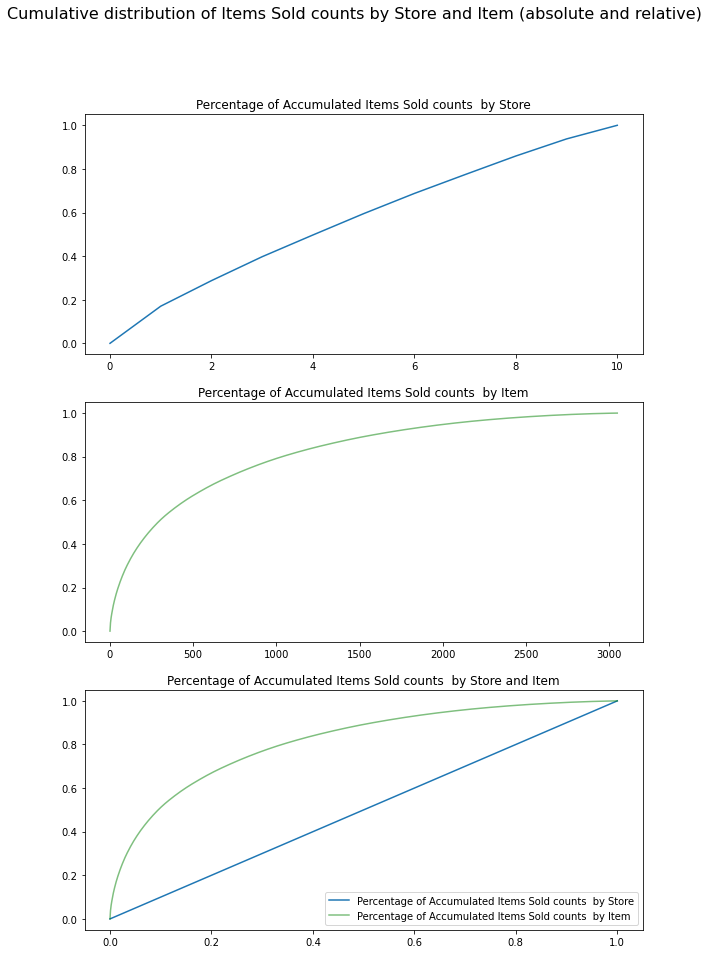

In [59]:
# Let's plot the cummulative sums
# Instantiate the figure
fig = plt.figure(figsize = (10, 15))
ax1, ax2, ax3 = fig.subplots(nrows = 3, ncols = 1)

# get the data
# concate a zero before the list, so that all curves start at origin
x1_values = [0] + list(top10_store_new.index)
y1_values = [0] + list(top10_store_new["cumsum_by_store"])

x2_values = [0] + list(Sold_by_item["cumsum_by_item"])
y2_values = [0] + list(Sold_by_item["cumsum_by_item"])

x3_values_Store = [0] + list(top10_store_new["pct_store"])
y3_values_Store = [0] + list(top10_store_new["cumsum_by_store"])

x3_values_item = [0] + list(Sold_by_item["pct_item"])
y3_values_item = [0] + list(Sold_by_item["cumsum_by_item"])

# plot the values and set for every subplot a title
ax1.plot(y1_values)
ax1.title.set_text("Percentage of Accumulated Items Sold counts  by Store")

ax2.plot(y2_values, color = "green", alpha = 0.5)
ax2.title.set_text("Percentage of Accumulated Items Sold counts  by Item")

ax3.plot(x3_values_Store, y3_values_Store, label = "Percentage of Accumulated Items Sold counts  by Store")
ax3.plot(x3_values_item, y3_values_item, label = "Percentage of Accumulated Items Sold counts  by Item", 
         color = "green", alpha = 0.5)
ax3.title.set_text("Percentage of Accumulated Items Sold counts  by Store and Item")

ax3.legend()

# create a title for the figure
fig.suptitle('Cumulative distribution of Items Sold counts by Store and Item (absolute and relative)', fontsize = 16);

# Revenue by Store and Item

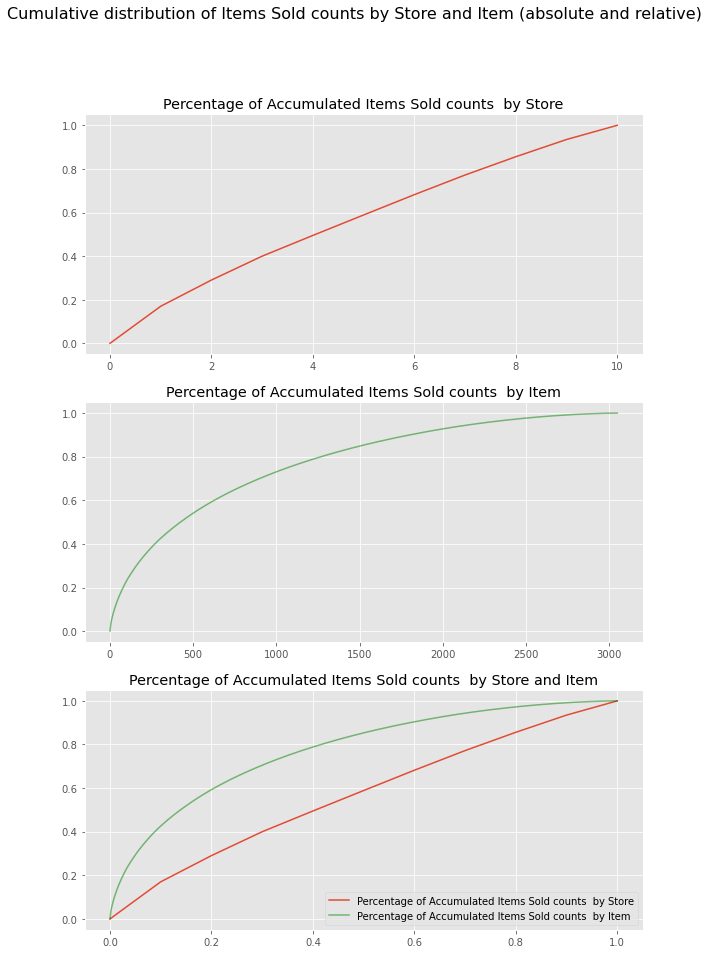

In [ ]:
#----------------------
# Plotting part

# Instantiate the figure
fig = plt.figure(figsize = (10, 15))
ax1, ax2, ax3 = fig.subplots(nrows = 3, ncols = 1)

# get the data
# concate a zero before the list, so that all curves start at origin
x1_values = [0] + list(Sold_by_Store.index)
y1_values = [0] + list(Sold_by_Store["cumsum_by_store"])

x2_values = [0] + list(Sold_by_item["cumsum_by_item"])
y2_values = [0] + list(Sold_by_item["cumsum_by_item"])

x3_values_Store = [0] + list(Sold_by_Store["pct_store"])
y3_values_Store = [0] + list(Sold_by_Store["cumsum_by_store"])

x3_values_item = [0] + list(Sold_by_item["pct_item"])
y3_values_item = [0] + list(Sold_by_item["cumsum_by_item"])

# plot the values and set for every subplot a title
ax1.plot(y1_values)
ax1.title.set_text("Percentage of Accumulated Items Sold counts  by Store")

ax2.plot(y2_values, color = "green", alpha = 0.5)
ax2.title.set_text("Percentage of Accumulated Items Sold counts  by Item")

ax3.plot(x3_values_Store, y3_values_Store, label = "Percentage of Accumulated Items Sold counts  by Store")
ax3.plot(x3_values_item, y3_values_item, label = "Percentage of Accumulated Items Sold counts  by Item", 
         color = "green", alpha = 0.5)
ax3.title.set_text("Percentage of Accumulated Items Sold counts  by Store and Item")

ax3.legend()

# create a title for the figure
fig.suptitle('Cumulative distribution of Items Sold counts by Store and Item (absolute and relative)', fontsize = 16);